In [1]:
import pandas as pd
import numpy as np 
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
iris=datasets.load_iris()

In [3]:
#Loading data into a DataFrame for easier manipulation and visualization
iris_df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
iris_df['species']=iris.target_names[iris.target]

In [4]:
#Display basic information and the first few rows of the DataFrame
iris_df.info()
iris_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

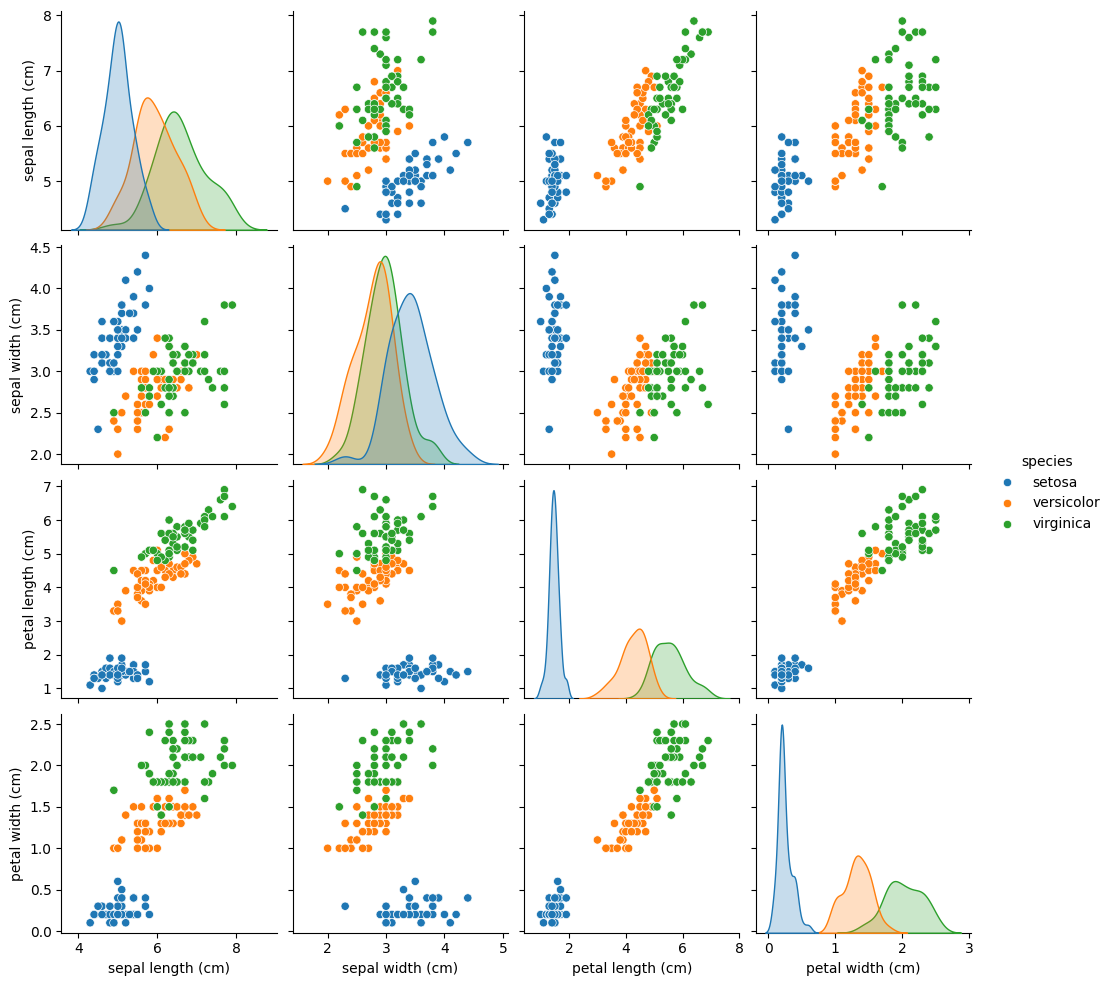

In [5]:
#exploring data distribution
sns.pairplot(iris_df,hue='species')
plt.show()

In [6]:
#Preporcessing data spliting and feature scaling
from sklearn.model_selection import train_test_split

X=iris.data
y=iris.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [7]:
#Initialize models
models = {
    'Logistic Regression':LogisticRegression(max_iter=200),
    'K-Nearest Neighbors':KNeighborsClassifier(),
    'Support Vector Machine':SVC(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'XGBoost':XGBClassifier(use_label_encoder=False,eval_metric='mlogloss')
}


In [8]:
#Train and evaluate models
accuracies = {}
for i,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracies[i]=accuracy_score(y_test,y_pred)

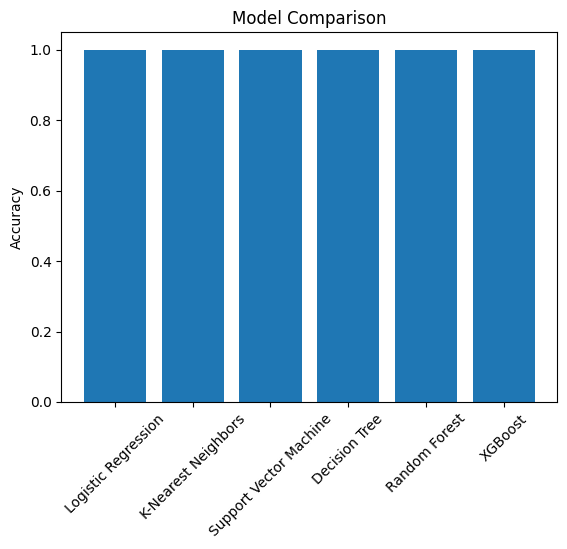

In [9]:
#ploting results
plt.bar(accuracies.keys(),accuracies.values())
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.title('Model Comparison')
plt.show()